In [117]:
import pandas as pd
import ujson
import json
import constants
import pickle as pckl
json_surah_words = 'json-surah-words/'

In [2]:
# surah_df = pd.read_json(json_surah_words + '1.json')
# for i in range(2, 115):
#     cur_df = pd.read_json(json_surah_words + str(i) + '.json')
#     surah_df = pd.concat([surah_df, cur_df], ignore_index=True)
#     print(len(surah_df))


In [20]:
fh = open("surah_df.pckl","rb")
surah_df = pckl.load(fh)
fh.close()
surah_df.head(5)

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,rootWordType,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,True,0,الَّذِينَ,981575111091,ٱلَّذِى,59,nominal,1007002,1,alladhīna,ٱلَّذِى,"who, which, that",1464,alladhī,Nominal (Relative pronoun),2
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,triliteral root,1001002,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,True,148,لِلَّهِ,338108719184,أ ل ه,61,triliteral root,1002002,1,lillahi,ٱللَّه,Allah,2699,allah,Proper noun,2
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,True,1,الْحَمْدُ,787905890794,ح م د,352,triliteral root,1002001,1,al-ḥamdu,حَمْد,False,43,ḥamd,Noun,1
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,True,2,الدِّينِ,335755371025,د ي ن,498,triliteral root,1004003,1,l-dīni,دِين,False,92,dīn,Noun,3


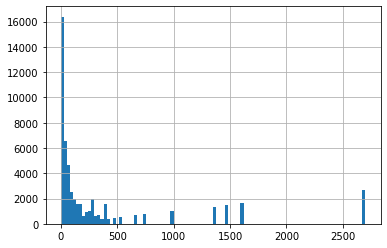

In [21]:
# surah_df[['ayahnum', 'frequency', 'rootWordId', 'tlit', 'waznType']]
df = surah_df[['rootWordId', 'waznEnglish', 'waznFreq', 'waznTlit', 'waznType']].copy(deep=True)

df['waznFreq'].hist(bins=100)

In [70]:
row = surah_df.loc[(surah_df['surahnum'] == 1) & (surah_df['ayahnum'] == 5)]
row

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId
14,we worship,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,275,True,0,نَعْبُدُ,381352820716,ع ب د,948,...,1005002,1,naʿbudu,عَبَدَ,to worship,122,ʿabada,Verb (form I),2,ʿabada122
16,we ask for help,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,11,True,4,نَسْتَعِينُ,113176584047,ع و ن,1041,...,1005004,1,nastaʿīnu,ٱسْتَعِينُ,to seek help,4,is'taʿīnu,Verb (form X),4,is'taʿīnu4


In [22]:
import numpy as np
df = df.drop_duplicates(['waznFreq', 'waznTlit'])
df["waznId"] = df["waznTlit"] + df["waznFreq"].astype(str)
df.head(20)

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464
1,61,Allah,2699,allah,Proper noun,allah2699
3,352,False,43,ḥamd,Noun,ḥamd43
4,498,False,92,dīn,Noun,dīn92
5,524,False,975,rabb,Noun,rabb975
6,544,False,57,raḥmān,Nominal (Adjective),raḥmān57
8,544,False,116,raḥīm,Nominal (Adjective),raḥīm116
10,726,False,39,is'm,Noun,is'm39
11,836,False,45,ṣād rā ṭā,Noun,ṣād rā ṭā45
13,891,False,14,ḍāll,Active participle (Noun),ḍāll14


In [23]:
with open('outputs/word-scores.json') as f:
    data = json.load(f)
data

{"(59, 'alladhī')": 206.2933827344372,
 "(61, 'allah')": 846.3059313215401,
 "(352, 'ḥamd')": 14.04786680541103,
 "(498, 'dīn')": 53.97412199091571,
 "(524, 'rabb')": 316.85744016649323,
 "(544, 'raḥmān')": 38.46153846153847,
 "(544, 'raḥīm')": 74.01247401247402,
 '(726, "is\'m")': 12.79916753381894,
 "(836, 'ṣād rā ṭā')": 26.802218111927324,
 "(891, 'ḍāll')": 2.036094401147428,
 "(948, 'ʿabada')": 160.99585062240664,
 "(1016, 'ʿālamīn')": 22.99687825182102,
 '(1041, "is\'taʿīnu")': 5.809128630705394,
 "(1067, 'maghḍūb')": 0.23137436376675322,
 "(1095, 'ghayr')": 20.59231837524104,
 '(1246, "mus\'taqīm")': 21.626617373072392,
 "(1415, 'mālik')": 2.957486136488532,
 "(1492, 'anʿama')": 2.4525682559275843,
 "(1547, 'hadā')": 80.22181145225143,
 "(1664, 'yā wāw mīm')": 227.54158962608645,
 "(1, 'ādam')": 1.060459991630644,
 "(5, 'hamza bā dāl')": 2.9921795316691946,
 '(6, "ib\'rāhīm")': 1.3475685176746306,
 '(9, "ib\'līs")': 0.38190024287468505,
 "(10, 'ābā')": 0.6749078895216875,
 "(11, 

In [24]:
df['score'] = 0
for i in range(len(df)):
    word_id = df.iloc[i,0]
    wazn_tlit = df.iloc[i,3]
    if '\'' in wazn_tlit:
        key = '(' + str(word_id) + ', "' + wazn_tlit + '")'
    else:
        key = "(" + str(word_id) + ", '" + wazn_tlit + "')"
    df.iloc[i,6] = data[key]
df = df.sort_values(by='score', ascending=False)
df

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931
5,524,False,975,rabb,Noun,rabb975,316.857440
23,1664,False,405,yā wāw mīm,Nominal (Noun),yā wāw mīm405,227.541590
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464,206.293383
3111,1245,to say,1618,qāla,Verb (form I),qāla1618,166.678001
...,...,...,...,...,...,...,...
1449,330,False,2,ḥāḍirat,Active participle (Adjective),ḥāḍirat2,0.001156
3074,1199,False,2,aqsaṭ,Noun,aqsaṭ2,0.001156
1733,498,to contract,1,tadāyan,Verb (form VI),tadāyan1,0.001156
1723,494,to carry out,1,tudīru,Verb (form IV),tudīru1,0.000578


In [25]:
verb_df = df.copy(deep=True)
mask = df['waznType'].str.contains('Verb ()')
verb_df = df[mask]
other_df = df.copy(deep=True)
other_df = df[~mask]
other_df.head(20)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931
5,524,False,975,rabb,Noun,rabb975,316.857440
23,1664,False,405,yā wāw mīm,Nominal (Noun),yā wāw mīm405,227.541590
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464,206.293383
3314,1256,False,260,kitāb,Noun,kitāb260,82.206035
8,544,False,116,raḥīm,Nominal (Adjective),raḥīm116,74.012474
265,32,"the Earth, land",461,hamza rā ḍād,Noun,hamza rā ḍād461,65.016196
777,63,"to, toward, until",742,ilā,Preposition,ilā742,58.682635
219,27,when,409,idhā,Nominal (Time adverb),idhā409,58.260065
4,498,False,92,dīn,Noun,dīn92,53.974122


In [26]:
prep_df = df.copy(deep=True)
mask = df['waznType'].str.contains('Proper')
prep_df = df[mask]
prep_df

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931
44195,1415,False,1,mālik,Proper noun,mālik1,2.957486
2197,776,False,88,shīn ṭā nūn,Nominal (Proper noun),shīn ṭā nūn88,2.261712
293,41,Israel,43,is'rāīl,Proper noun,is'rāīl43,1.776615
11592,64,Elijah,3,il'yās,Proper noun,il'yās3,1.663586
30,6,Ibrahim,69,ib'rāhīm,Proper noun,ib'rāhīm69,1.347569
14624,854,False,9,ṣāliḥ,Proper noun,ṣāliḥ9,1.280203
53179,34,Iram,1,iram,Proper noun,iram1,1.244813
47199,778,False,1,shiʿ'rā,Proper noun,shiʿ'rā1,1.244813
24,1,Adam,25,ādam,Proper noun,ādam25,1.060460


In [27]:
verb_df = verb_df.sort_values(by='score', ascending=False)
other_df['row'] = np.arange(float(len(other_df)))
verb_df['row'] = np.arange(float(len(verb_df)))
verb_df.head(21)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score,row
3111,1245,to say,1618,qāla,Verb (form I),qāla1618,166.678001,0.0
14,948,to worship,122,ʿabada,Verb (form I),ʿabada122,160.995851,1.0
3475,1305,to be,1358,kāna,Verb (form I),kāna1358,84.715079,2.0
22,1547,to guide,144,hadā,Verb (form I),hadā144,80.221811,3.0
856,75,to believe,537,āmana,Verb (form IV),āmana537,55.389323,4.0
73,12,to give,271,ātā,Verb (form IV),ātā271,37.899121,5.0
3387,1280,to disbelieve,289,kafara,Verb (form I),kafara289,29.751785,6.0
3758,1460,"to send down, to reveal",183,anzala,Verb (form IV),anzala183,28.995315,7.0
2217,789,"to be grateful, to give thanks",46,shakara,Verb (form I),shakara46,26.247689,8.0
1852,536,to return,79,rajaʿa,Verb (form I),rajaʿa79,25.702393,9.0


In [132]:
verb_df['level'] = 0
verb_df.iloc[:20,8] = (np.ceil(verb_df['row'] / 4) * 4) / 4
verb_df.iloc[:20,8] = verb_df.iloc[:20,8].astype(int)
verb_df.iloc[20:141,8] = (np.ceil(verb_df['row'] / 7 + 2) * 7) / 7
verb_df.iloc[20:141,8] = verb_df.iloc[20:141,8].astype(int)
verb_df.iloc[141:,8] = (np.ceil(verb_df['row'] / 20 + 15) * 20) / 20
verb_df.iloc[141:,8] = verb_df.iloc[141:,8].astype(int)
#verb_df['level'] = verb_df['level'].astype(str) + 'b'
verb_df.head(35)

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score,row,level
3111,1245,to say,1618,qāla,Verb (form I),qāla1618,166.678001,0.0,0.0
14,948,to worship,122,ʿabada,Verb (form I),ʿabada122,160.995851,1.0,1.0
3475,1305,to be,1358,kāna,Verb (form I),kāna1358,84.715079,2.0,1.0
22,1547,to guide,144,hadā,Verb (form I),hadā144,80.221811,3.0,1.0
856,75,to believe,537,āmana,Verb (form IV),āmana537,55.389323,4.0,1.0
73,12,to give,271,ātā,Verb (form IV),ātā271,37.899121,5.0,2.0
3387,1280,to disbelieve,289,kafara,Verb (form I),kafara289,29.751785,6.0,2.0
3758,1460,"to send down, to reveal",183,anzala,Verb (form IV),anzala183,28.995315,7.0,2.0
2217,789,"to be grateful, to give thanks",46,shakara,Verb (form I),shakara46,26.247689,8.0,2.0
1852,536,to return,79,rajaʿa,Verb (form I),rajaʿa79,25.702393,9.0,3.0


In [131]:
other_df['level'] = 0
other_df.iloc[:20,8] = (np.ceil(other_df['row'] / 4) * 4) / 4
other_df.iloc[:20,8] = other_df.iloc[:20,8].astype(int)
other_df.iloc[20:141,8] = (np.ceil(other_df['row'] / 7 + 2) * 7) / 7
other_df.iloc[20:141,8] = other_df.iloc[20:141,8].astype(int)
other_df.iloc[141:,8] = (np.ceil(other_df['row'] / 20 + 15) * 20) / 20
other_df.iloc[141:,8] = other_df.iloc[141:,8].astype(int)
#other_df['level'] = other_df['level'].astype(str) + 'a'
other_df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score,row,level
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931,0.0,0.0
5,524,False,975,rabb,Noun,rabb975,316.857440,1.0,1.0
23,1664,False,405,yā wāw mīm,Nominal (Noun),yā wāw mīm405,227.541590,2.0,1.0
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464,206.293383,3.0,1.0
3314,1256,False,260,kitāb,Noun,kitāb260,82.206035,4.0,1.0
...,...,...,...,...,...,...,...,...,...
31187,31,physical desire,1,ir'bat,Noun,ir'bat1,0.001849,3197.0,175.0
31538,435,False,1,khumur,Noun,khumur1,0.001849,3198.0,175.0
2335,843,False,3,ṣaghīr,Noun,ṣaghīr3,0.001734,3199.0,175.0
1449,330,False,2,ḥāḍirat,Active participle (Adjective),ḥāḍirat2,0.001156,3200.0,175.0


In [133]:
verb_levels=verb_df[['waznId', 'level']].copy(deep=True)
t1=verb_levels.head()
verb_levels

,waznId,level
3111,qāla1618,0.0
14,ʿabada122,1.0
3475,kāna1358,1.0
22,hadā144,1.0
856,āmana537,1.0
...,...,...
3797,nunshizu1,89.0
2012,sīn hamza mīm3,89.0
1733,tadāyan1,89.0
1723,tudīru1,89.0


In [134]:
other_levels=other_df[['waznId', 'level']].copy(deep=True)
other_t1=other_levels.head()
other_levels

,waznId,level
1,allah2699,0.0
5,rabb975,1.0
23,yā wāw mīm405,1.0
0,alladhī1464,1.0
3314,kitāb260,1.0
...,...,...
31187,ir'bat1,175.0
31538,khumur1,175.0
2335,ṣaghīr3,175.0
1449,ḥāḍirat2,175.0


In [135]:
surah_df['waznId'] = surah_df["waznTlit"] + surah_df["waznFreq"].astype(str)
t2=surah_df.head()

In [123]:
t1

,waznId,level
3111,qāla1618,0.0b
14,ʿabada122,1.0b
3475,kāna1358,1.0b
22,hadā144,1.0b
856,āmana537,1.0b


In [157]:
swl_verb[swl_verb['question_id'] == 471230904956]

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId,level
19297,give attention,فَأَنْتَ لَهُ تَصَدَّىٰ,6,2,True,0,تَصَدَّىٰ,471230904956,ص د ي,831,...,80,taṣaddā,تَصَدَّىٰ,to give attention,1,taṣaddā,Verb (form V),3,taṣaddā1,9.0


In [55]:
morpheme_df.head(20)

,surahnum,ayahnum,wordnum,morphemeEnglishList,morphemeArabicList,seg_count
0,1,1,1,"[[P, segRust, prefixed preposition bi], [N, se...",[جار ومجرور],2
1,1,1,2,"[[PN, segBlue, genitive proper noun → Allah]]",[لفظ الجلالة مجرور],1
2,1,1,3,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1
3,1,1,4,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1
4,1,2,1,"[[N, segSky, nominative masculine noun]]",[اسم مرفوع],1
5,1,2,2,"[[P, segRust, prefixed preposition lām], [PN, ...",[جار ومجرور],2
6,1,2,3,"[[N, segSky, genitive masculine noun]]",[اسم مجرور],1
7,1,2,4,"[[N, segSky, genitive masculine plural noun]]",[اسم مجرور],1
8,1,3,1,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1
9,1,3,2,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1


In [72]:
fh = open("morphemes_segcount.pckl","rb")
morpheme_df = pckl.load(fh)
fh.close()
morph_dict = dict()
for i in range(len(morpheme_df)):
    row = morpheme_df.iloc[i]
    match_row = surah_df.loc[(surah_df['surahnum'] == row['surahnum']) &
                             (surah_df['ayahnum'] == row['ayahnum']) &
                             (surah_df['wordnum'] == row['wordnum'])]
    if len(match_row) is 0:
        continue
    wazn_id = match_row['waznId'].values
    wazn_id = wazn_id[0]
    if wazn_id in morph_dict:
        avg, total = morph_dict.get(wazn_id)
        curr = row['seg_count']
        new_avg = ((avg * total) + curr) / (total + 1)
        total += 1
        morph_dict[wazn_id] = (new_avg, total)
    else:
        morph_dict[wazn_id] = (row['seg_count'], 1)
morph_dict

{"is'm39": (1.4615384615384615, 39),
 'allah2699': (1.2152649129307111, 2699),
 'raḥmān57': (1.2105263157894737, 57),
 'raḥīm116': (1.0, 116),
 'ḥamd43': (1.5116279069767442, 43),
 'rabb975': (2.010256410256411, 975),
 'ʿālamīn73': (1.164383561643836, 73),
 'mālik3': (1.0, 3),
 'yā wāw mīm405': (1.2567901234567906, 405),
 'dīn92': (1.3913043478260876, 92),
 'ʿabada122': (2.1065573770491794, 122),
 "is'taʿīnu4": (2.0, 4),
 'hadā144': (1.8472222222222223, 144),
 'ṣād rā ṭā45': (1.044444444444444, 45),
 "mus'taqīm37": (1.0, 37),
 'alladhī1464': (1.2199453551912558, 1464),
 'anʿama17': (1.7647058823529411, 17),
 'ghayr147': (1.5578231292517009, 147),
 'maghḍūb1': (1, 1),
 'ḍāll14': (1.1428571428571428, 14),
 'kitāb260': (1.1576923076923078, 260),
 'rayb18': (1.0555555555555556, 18),
 'hudan85': (1.388235294117647, 85),
 'muttaqīn49': (1.4081632653061225, 49),
 'āmana537': (1.9422718808193669, 537),
 'ghayb49': (1.3061224489795922, 49),
 'aqāma54': (2.4629629629629624, 54),
 'ṣalat83': (1.2

In [136]:
swl_verb = surah_df.merge(verb_levels).copy(deep=True)

swl_verb = swl_verb.drop_duplicates(['waznId', 'tlit', 'waznEnglish', 'question'])
swl_verb = swl_verb.drop_duplicates(['tlit'])
swl_verb = swl_verb.sort_values(by='level', ascending=True)
#for i in range(len(swl_verb) - 15):
 #   row = swl_verb.iloc[i]
  #  word_id = row['rootWordId']
   # level = row['level']
    #next_levels = swl_verb.loc[(swl_verb['level'] == (level + 1)) | (swl_verb['level'] == (level + 2))]
    #common = next_levels.loc[next_levels['rootWordId'] == word_id]
    #if len(common) > 0:
     #   print('level is ' + str(level))
      #  print(word_id)
       # print(common['level'])
swl_verb.head(50)
# len(swl)

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId,level
9845,Do you say,قُلْ إِنَّ اللَّهَ لَا يَأْمُرُ بِالْفَحْشَاء...,28,1722,True,399,أَتَقُولُونَ,442472151518,ق و ل,1245,...,7,ataqūlūna,قَالَ,to say,1618,qāla,Verb (form I),17,qāla1618,0.0
9840,Both of them said,قَالَا رَبَّنَا ظَلَمْنَا أَنْفُسَنَا,23,1722,True,394,قَالَا,287492685805,ق و ل,1245,...,7,qālā,قَالَ,to say,1618,qāla,Verb (form I),1,qāla1618,0.0
9839,and [I] say,وَأَقُلْ لَكُمَا إِنَّ الشَّيْطَانَ لَكُمَا ع...,22,1722,True,393,وَأَقُلْ,579139362976,ق و ل,1245,...,7,wa-aqul,قَالَ,to say,1618,qāla,Verb (form I),22,qāla1618,0.0
9803,that they (may) say,وَكَذَٰلِكَ نُصَرِّفُ الْآيَاتِ وَلِيَقُولُوا...,105,1722,True,357,وَلِيَقُولُوا,882698809925,ق و ل,1245,...,6,waliyaqūlū,قَالَ,to say,1618,qāla,Verb (form I),4,qāla1618,0.0
9775,that they say,وَكَذَٰلِكَ فَتَنَّا بَعْضَهُمْ بِبَعْضٍ لِيَ...,53,1722,True,329,لِيَقُولُوا,454645792148,ق و ل,1245,...,6,liyaqūlū,قَالَ,to say,1618,qāla,Verb (form I),5,qāla1618,0.0
9772,(do) I say,قُلْ لَا أَقُولُ لَكُمْ عِنْدِي خَزَائِنُ الل...,50,1722,True,326,أَقُولُ,879202431493,ق و ل,1245,...,6,aqūlu,قَالَ,to say,1618,qāla,Verb (form I),3,qāla1618,0.0
9756,We will say,ثُمَّ نَقُولُ لِلَّذِينَ أَشْرَكُوا أَيْنَ شُ...,22,1722,True,310,نَقُولُ,4162693004,ق و ل,1245,...,6,naqūlu,قَالَ,to say,1618,qāla,Verb (form I),5,qāla1618,0.0
9744,surely (would) have said,فَلَمَسُوهُ بِأَيْدِيهِمْ لَقَالَ الَّذِينَ ك...,7,1722,True,298,لَقَالَ,697539466813,ق و ل,1245,...,6,laqāla,قَالَ,to say,1618,qāla,Verb (form I),9,qāla1618,0.0
9742,I said,مَا قُلْتُ لَهُمْ إِلَّا مَا أَمَرْتَنِي بِهِ...,117,1722,True,296,قُلْتُ,925255645890,ق و ل,1245,...,5,qul'tu,قَالَ,to say,1618,qāla,Verb (form I),2,qāla1618,0.0
9741,said it,إِنْ كُنْتُ قُلْتُهُ فَقَدْ عَلِمْتَهُ تَعْلَ...,116,1722,True,295,قُلْتُهُ,881317922222,ق و ل,1245,...,5,qul'tuhu,قَالَ,to say,1618,qāla,Verb (form I),29,qāla1618,0.0


In [137]:
swl_other = surah_df.merge(other_levels).copy(deep=True)
swl_other = swl_other.drop_duplicates(['waznId', 'tlit', 'waznEnglish', 'question'])
swl_other = swl_other.drop_duplicates(['tlit'])
swl_other = swl_other.sort_values(by='level', ascending=True)
swl_other.head(50)

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId,level
1472,And Allah,وَاللَّهُ مُحِيطٌ بِالْكَافِرِينَ,19,2851,True,155,وَاللَّهُ,465993455962,أ ل ه,61,...,2,wal-lahu,ٱللَّه,Allah,2699,allah,Proper noun,17,allah2699,0.0
1533,And for Allah,وَلِلَّهِ الْمَشْرِقُ وَالْمَغْرِبُ,115,2851,True,216,وَلِلَّهِ,82882992847,أ ل ه,61,...,2,walillahi,ٱللَّه,Allah,2699,allah,Proper noun,1,allah2699,0.0
1531,[So] Allah,فَاللَّهُ يَحْكُمُ بَيْنَهُمْ يَوْمَ الْقِيَا...,113,2851,True,214,فَاللَّهُ,354358718651,أ ل ه,61,...,2,fal-lahu,ٱللَّه,Allah,2699,allah,Proper noun,23,allah2699,0.0
2660,Is it Allah,قُلْ أَبِاللَّهِ وَآيَاتِهِ وَرَسُولِهِ كُنْت...,65,2851,True,1343,أَبِاللَّهِ,468630343766,أ ل ه,61,...,9,abil-lahi,ٱللَّه,Allah,2699,allah,Proper noun,9,allah2699,0.0
1470,Allah,اللَّهُ يَسْتَهْزِئُ بِهِمْ وَيَمُدُّهُمْ فِي...,15,2851,True,153,اللَّهُ,233574141326,أ ل ه,61,...,2,al-lahu,ٱللَّه,Allah,2699,allah,Proper noun,1,allah2699,0.0
1468,Allah,يُخَادِعُونَ اللَّهَ وَالَّذِينَ آمَنُوا وَمَ...,9,2851,True,151,اللَّهَ,738355908341,أ ل ه,61,...,2,l-laha,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699,0.0
1467,in Allah,وَمِنَ النَّاسِ مَنْ يَقُولُ آمَنَّا بِاللَّه...,8,2851,True,150,بِاللَّهِ,598559338691,أ ل ه,61,...,2,bil-lahi,ٱللَّه,Allah,2699,allah,Proper noun,6,allah2699,0.0
1466,Allah,خَتَمَ اللَّهُ عَلَىٰ قُلُوبِهِمْ وَعَلَىٰ سَ...,7,2851,True,149,اللَّهُ,450584991756,أ ل ه,61,...,2,l-lahu,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699,0.0
1465,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,True,148,لِلَّهِ,338108719184,أ ل ه,61,...,1,lillahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699,0.0
1464,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,...,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699,0.0


In [99]:
import ujson

level_freq = dict()
i = 0
level = 0
total = 0

while i < len(verb_df):
    row_other = other_df.iloc[i]
    row_verb = verb_df.iloc[i]
    count = 0
    while row_other['level'] == level:
        count += row_verb['waznFreq']
        count += row_other['waznFreq']
        i += 1
        row_other = other_df.iloc[i]
        if i < len(verb_df):
            row_verb = verb_df.iloc[i]
    level_freq[level] = (count / 77430) * 100
    total += ((count / 77430) * 100)
    level += 1

print(total)
while i < len(other_df):
    row_other = other_df.iloc[i]
    count = 0
    while row_other['level'] == level:
        count += row_other['waznFreq']
        i += 1
        if i < len(other_df):
            row_other = other_df.iloc[i]
        else:
            break
    level_freq[level] = (count / 77430) * 100
    total += ((count / 77430) * 100)
    level += 1

print(total)
with open("level_freq.json", 'w') as f:
    ujson.dump(level_freq, f, ensure_ascii=False, indent=4)

63.732403461190735
69.64613199018453


In [152]:
swl_other[['question_id', 'level']]
output_other = swl_other.groupby('level').question_id.apply(lambda x: ','.join(map(str, x))).reset_index()
output_other.loc[:,'question_id'] = output_other.loc[:, 'question_id'].apply(lambda x: [int(y) for y in x.split(",")])
output_other['level'] = output_other['level'].astype(str) + 'a'
output_other.head()

,level,question_id
0,0.0a,"[465993455962, 82882992847, 354358718651, 4686..."
1,1.0a,"[585089795199, 743846641536, 775755566858, 154..."
2,2.0a,"[651673960840, 921547323998, 359521221029, 924..."
3,3.0a,"[892499319435, 608656592736, 669568340702, 745..."
4,4.0a,"[917721248071, 187860226933, 270307926025, 888..."


In [151]:
swl_verb[['question_id', 'level']]
output_verb = swl_verb.groupby('level').question_id.apply(lambda x: ','.join(map(str, x))).reset_index()
output_verb.loc[:,'question_id'] = output_verb.loc[:, 'question_id'].apply(lambda x: [int(y) for y in x.split(",")])
output_verb['level'] = output_verb['level'].astype(str) + 'b'
output_verb.head()

,level,question_id
0,0.0b,"[442472151518, 287492685805, 579139362976, 882..."
1,1.0b,"[119444548868, 433328426707, 172969084531, 131..."
2,2.0b,"[851545657604, 298767176812, 833076426822, 210..."
3,3.0b,"[782157555265, 818952113396, 705082735323, 763..."
4,4.0b,"[670655208659, 541498990864, 888149821032, 806..."


In [160]:
levels_dict = []
for i in range(len(output_verb)):
    row_verb = output_verb.iloc[i]
    row_other = output_other.iloc[i]
    levels_dict.append({"level": row_other['level'], "question_ids": row_other['question_id']})
    levels_dict.append({"level": row_verb['level'], "question_ids": row_verb['question_id']})
for i in range(len(output_verb),len(output_other)):
    row_other = output_other.iloc[i]
    levels_dict.append({"level": row_other['level'], "question_ids": row_other['question_id']})
levels_dict

[{'level': '0.0a',
  'question_ids': [465993455962,
   82882992847,
   354358718651,
   468630343766,
   233574141326,
   738355908341,
   598559338691,
   450584991756,
   338108719184,
   748891323231,
   944019897074,
   419465861240,
   433171436329,
   117074569950,
   414913740930,
   30486700262,
   263568533340]},
 {'level': '0.0b',
  'question_ids': [442472151518,
   287492685805,
   579139362976,
   882698809925,
   454645792148,
   879202431493,
   4162693004,
   697539466813,
   925255645890,
   881317922222,
   837657004023,
   259628915446,
   438363612199,
   673484319523,
   495784726951,
   583620808517,
   341397204194,
   799030402617,
   196157693354,
   67598265032,
   161530996163,
   97055983198,
   102427298013,
   17121805940,
   533229087723,
   817535330192,
   374913721046,
   253474520732,
   827122998499,
   445840160199,
   313899928556,
   284188580304,
   349270575462,
   614785921378,
   235987973224,
   777235683312,
   848443950492,
   555430080137,


In [46]:
with open("outputs/wazn_levels.json", 'w') as f:
    ujson.dump(levels_dict, f, ensure_ascii=False, indent=4)